<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width="400px" style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



# **LLaVA: Leveraging Large Language Models for Multimodal Learning**

#### ***Could We Use Bigger LLMs in the Text Domain to Train Smaller Multimodal Models?***

In 2023, Large Language Models (LLMs) like GPT-4, LLaMA, and Vicuna had demonstrated remarkable capabilities in understanding and generating human-like text. These models are trained on vast amounts of text data and excel at tasks like question answering, summarization, and even following complex instructions. However, these models are inherently **text-only**—they lack the ability to process or understand visual information, which is a crucial aspect of human interaction with the world.

This raises an interesting question: **Can we leverage the power of these large, text-only LLMs to train smaller, multimodal models that can understand both text and images?** In other words, can we use the knowledge and instruction-following capabilities of LLMs to create models that can process visual inputs and generate meaningful, context-aware responses?

The answer is yes, and this is where **LLaVA (Large Language and Vision Assistant)** comes into play. LLaVA’s key innovation is **instruction tuning in the multimodal domain**, allowing it to generalize across tasks, perform complex reasoning, and engage in interactive, user-friendly conversations. Unlike its predecessors, LLaVA is designed to handle diverse tasks based on user instructions, making it a versatile and powerful multimodal assistant.

### **How is LLaVA Different from CLIP, BLIP, and BLIP-2?**

1. **CLIP**: CLIP aligns images and text in a shared embedding space, excelling at tasks like zero-shot classification and retrieval, but it lacks instruction-following capabilities and cannot generate detailed textual responses.

2. **BLIP**: BLIP combines vision and language for tasks like image captioning and visual question answering, but it requires task-specific fine-tuning and does not generalize across diverse tasks.

3. **BLIP-2**: BLIP-2 connects a frozen vision encoder and language model via a lightweight Q-Former, improving efficiency and performance, but it still focuses on task-specific fine-tuning rather than instruction following.

4. **LLaVA**: LLaVA introduces **visual instruction tuning**, enabling it to follow natural language instructions involving both images and text. It acts as a **general-purpose multimodal assistant**, capable of complex reasoning, multi-turn conversations, and open-ended interaction without task-specific fine-tuning.



#### **What is Instruction Tuning?**

```mermaid
graph TD
    I1["Instruction 1: Translate English to French\nTask: Good Morning, How are you?"]
    I2["Instruction 2: Summarize a paragraph\nTask: Provide a brief overview of this text."]
    I3["Instruction 3: Answer a math problem\nTask: What is 6 x 7?"]

    I1 --> LLM["LLM"]
    I2 --> LLM
    I3 --> LLM

    O1["Output 1: Bonjour, comment ça va?"]
    O2["Output 2: This is the summary of the paragraph."]
    O3["Output 3: The answer is 42."]

    LLM --> O1
    LLM --> O2
    LLM --> O3

    %% Style for specific tasks
    style I1 fill:#bbdefb,stroke:#1e88e5
    style O1 fill:#bbdefb,stroke:#1e88e5
    style I2 fill:#ffccbc,stroke:#ff7043
    style O2 fill:#ffccbc,stroke:#ff7043
    style I3 fill:#c8e6c9,stroke:#43a047
    style O3 fill:#c8e6c9,stroke:#43a047

```


Before diving into LLaVA, it’s important to understand the concept of **instruction tuning**. Instruction tuning is a technique used to fine-tune large language models (LLMs) to follow specific instructions or tasks. Instead of training a model to predict the next word in a sentence (as in traditional language modeling), instruction tuning involves training the model to perform tasks based on explicit instructions provided by the user.

For example, instead of just generating text, an instruction-tuned model can be asked to:
- Summarize a paragraph
- Answer a question based on a given context
- Write a story based on a prompt
- Follow complex, multi-step instructions

Instruction tuning has been shown to significantly improve the zero-shot and few-shot capabilities of LLMs, allowing them to generalize better to new tasks without requiring task-specific training data.



#### **How to Create a Dataset for Vision Instruction Tuning?**

<img src="../images/visual_instruction_tuning.png" alt="Visual Instruction Tuning" width="400">


One of the biggest challenges in training multimodal models is the lack of **vision-language instruction-following data**. Unlike text-only instruction tuning, where large datasets of instruction-following examples are available, creating a dataset for vision-language tasks is more complex. Here’s how we can approach this problem:

1. **Leveraging Existing Image-Text Pairs**: We can start with existing datasets of image-text pairs, such as COCO or CC3M, which contain images paired with captions. These datasets provide a good starting point, but they are not in an instruction-following format.

2. **Generating Instruction-Following Data**: To convert image-text pairs into instruction-following data, we can use a powerful LLM like GPT-4 to generate questions and answers based on the image content. For example, given an image of a dog playing in a park, GPT-4 can generate questions like:
   - "What is the dog doing?"
   - "What is the color of the dog?"
   - "Describe the scene in detail."

   These questions and answers can then be used to create a dataset where the model is trained to follow instructions based on both the image and the text.

3. **Types of Instruction-Following Data**: The dataset can include different types of instruction-following tasks, such as:
   - **Conversation**: Multi-turn dialogues where the model answers questions about the image.
   - **Detailed Description**: Tasks where the model provides a comprehensive description of the image.
   - **Complex Reasoning**: Tasks that require the model to perform reasoning based on the visual content, such as answering "Why is the dog running?"

By combining these approaches, we can create a rich dataset that allows the model to learn how to follow instructions in a multimodal context.


### **Model Architecture**

<img src="../images/llava_architecture.png" alt="Visual Instruction Tuning" width="600">

**How Can a Vision Encoder and an LLM Be Connected?**

Now, let’s think about how we can extend instruction tuning to the **multimodal domain**, where the model needs to process both images and text. The key idea is to connect a **vision encoder** (which processes images) with a **language model** (which processes text). Here’s a high-level overview of how this can be done:

1. **Vision Encoder**: A vision encoder, such as CLIP, is responsible for extracting meaningful features from images. CLIP, for example, is trained on a large dataset of image-text pairs and learns to map images and text into a shared embedding space. This allows the model to understand the visual content of an image and relate it to textual descriptions.

2. **Language Model**: A language model, such as Vicuna, is responsible for generating text-based responses. Vicuna is an instruction-tuned LLM that excels at following user instructions and generating coherent, context-aware responses.

3. **Connecting the Two**: To connect the vision encoder and the language model, we need a way to **project the visual features** extracted by the vision encoder into the **text embedding space** of the language model. This can be done using a simple **linear projection layer** that maps the visual features into the same dimensionality as the text embeddings. Once the visual features are in the same space as the text embeddings, the language model can process them alongside textual inputs, allowing the model to generate responses that take both the image and the text into account.






In [2]:
# import requests
from PIL import Image
import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig

## **Practical Example: Running LLaVA with Hugging Face**

In this section, we’ll walk through a practical example of using LLaVA to process multimodal inputs (images and text) and generate responses. 

#### **Roles of the Processor and Model**

1. **Processor**: The processor handles the preprocessing of inputs. It tokenizes the text, processes the image into visual features, and combines them into a format the model can understand. It ensures that both modalities (image and text) are aligned and ready for the model.

2. **Model**: The model (e.g., `LlavaForConditionalGeneration`) takes the preprocessed inputs and generates a response. It combines the visual features from the image with the tokenized text to produce a coherent, context-aware output.



#### **Quantization for Efficiency**

Quantization reduces the precision of the model’s weights, making it faster and more memory-efficient without significantly sacrificing performance.


In [3]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Configure quantization for efficient inference (only for CUDA)
if torch.cuda.is_available():
    quant_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_use_double_quant=True,
        bnb_4bit_compute_dtype=torch.bfloat16,
    )
else:
    quant_config = None



#### **Loading the Model and Processor**


In [4]:
# Load the processor and model in half-precision
model_name = "llava-hf/llava-1.5-7b-hf"
processor = AutoProcessor.from_pretrained(model_name)
    
# Prepare model loading arguments
model_kwargs = {
    "torch_dtype": torch.float16,  # Use half-precision for memory efficiency
    "device_map": "auto",  # Automatically map the model to available hardware
}
    
# Add quantization config only if available (CUDA only)
if quant_config is not None:
    model_kwargs["quantization_config"] = quant_config
    
model = LlavaForConditionalGeneration.from_pretrained(model_name, **model_kwargs)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
`torch_dtype` is deprecated! Use `dtype` instead!
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

With the model and processor loaded, we’re ready to process inputs and generate responses.

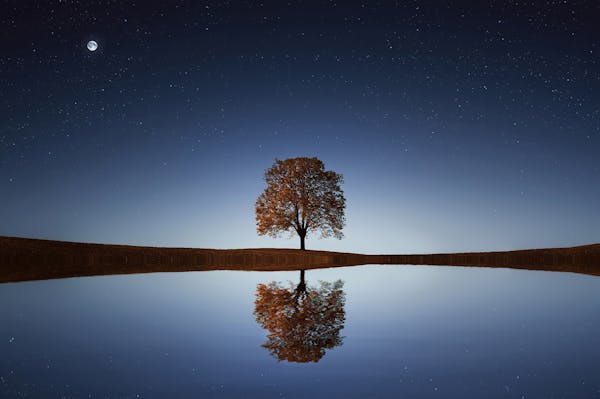

In [5]:
from svlearn_vlu import config

image_path = f"{config['datasets']['trees']}/pexels-photo-268533_1.jpeg"
image = Image.open(fp=image_path)
image

### **Input to a Hugging Face LLaVA Processor**

The input to a LLaVA processor is structured as a **list of messages**, where each message represents a turn in the conversation. Each message contains:
- A `"role"` (e.g., `"user"` or `"assistant"`).
- A `"content"` field, which is a list of **multimodal elements** (images and text).

For example:

In [6]:
conversation = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Describe the landscape."},
            ],
    }]

#### **Key Components:**
1. **`"role"`**: Indicates who is speaking (e.g., `"user"` for the person asking the question or `"assistant"` for the model's response).
2. **`"content"`**: A list of multimodal elements:
   - `{"type": "image"}`: Represents an image input. The actual image data is passed separately (e.g., as a PIL image or file path).
   - `{"type": "text", "text": "..."}`: Represents a text input, such as a question or instruction.



### **Why Do We Need a Chat Template?**

A **chat template** is essential for structuring the conversation in a way that the model can process effectively. Here’s why it’s needed:

1. **Multimodal Input Handling**: LLaVA processes both images and text, so the input must clearly distinguish between the two. The chat template ensures that the model knows which parts of the input are images and which are text.

2. **Conversation Context**: In multi-turn conversations, the model needs to keep track of the context (e.g., previous questions and answers). The chat template organizes the conversation into turns, making it easier for the model to understand the flow.

3. **Instruction Following**: LLaVA is trained to follow instructions, so the chat template ensures that the user’s instructions (text) are properly paired with the relevant visual input (image).


### **How the Chat Template Works**

The chat template typically converts the structured input (like the `conversation` list above) into a format that the model can process. For example:
- The image is passed through the **vision encoder** (e.g., CLIP) to extract visual features.
- The text is tokenized and passed to the **language model** (e.g., Vicuna).
- The chat template ensures that the visual and textual inputs are combined in the correct order and format.

For instance, the template might convert the input into something like:

In [7]:
text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
text_prompt

'USER: <image>\nDescribe the landscape. ASSISTANT:'

In this step, the **processor** combines the image and text inputs into a format the model can understand. It tokenizes the text, processes the image into visual features, and pads the inputs to ensure consistent lengths. The result is a tensor ready for the model, moved to the appropriate device (e.g., GPU) and data type (e.g., `float16`).

In [8]:
# We can simply feed images in the order they have to be used in the text prompt
inputs = processor(images=[image], text=[text_prompt], padding=True, return_tensors="pt").to(model.device, torch.float16)

In this step, the **model generates a response** based on the processed inputs. The `generate` function uses the combined image-text features to produce a sequence of token IDs, with a limit of `max_new_tokens=200` to control the response length. The output, `generate_ids`, contains the tokenized response, which can be decoded into human-readable text.

In [9]:
generate_ids = model.generate(**inputs, max_new_tokens=200)
generate_ids

tensor([[    1,  3148,  1001, 29901, 29871, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 3

In this step, the **processor decodes the generated token IDs** into human-readable text. The `batch_decode` function converts the token IDs (`generate_ids`) back into words, skipping special tokens (like padding or end-of-sequence markers) to produce a clean, readable output. The result, `output`, is the final text response from the model.

In [10]:
from svlearn_vlu.llava.chat_utils import ChatHelper

formatter = ChatHelper()

output = processor.batch_decode(generate_ids, skip_special_tokens=True)

print(formatter.chat_format(output[0]))

USER:
Describe the landscape.
ASSISTANT:
The landscape features a lone tree standing in a field, with a body of water,
possibly a lake, reflecting its image. The sky is dark, and the night sky is
filled with stars, creating a serene and peaceful atmosphere. The tree is the
focal point of the scene, and its reflection in the water adds depth and beauty
to the image.


We can observe that the caption is more descriptive than any previous Visual Language Generation model we have seen thus far. "A lone tree" brings out the emotion of the picture. However "The scene is captured in a black and white photo" is not technically correct eventhough the image is devoid of vibrant colors. Now let's add a follow up task. 

In [11]:
conversation = formatter.convert_output_to_conversation(output_text=output[0])
conversation

[{'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text', 'text': 'Describe the landscape.'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': 'The landscape features a lone tree standing in a field, with a body of water, possibly a lake, reflecting its image. The sky is dark, and the night sky is filled with stars, creating a serene and peaceful atmosphere. The tree is the focal point of the scene, and its reflection in the water adds depth and beauty to the image.'}]}]

In [12]:
conversation = formatter.create_chat_template("Write a poem about this place", previous_conversation=conversation)
conversation

[{'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text', 'text': 'Describe the landscape.'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': 'The landscape features a lone tree standing in a field, with a body of water, possibly a lake, reflecting its image. The sky is dark, and the night sky is filled with stars, creating a serene and peaceful atmosphere. The tree is the focal point of the scene, and its reflection in the water adds depth and beauty to the image.'}]},
 {'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text', 'text': 'Write a poem about this place'}]}]

In [13]:
text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
inputs = processor(images=[image, image], text=[text_prompt], padding=True, return_tensors="pt").to(model.device, torch.float16)
generate_ids = model.generate(**inputs, max_new_tokens=200)
output = processor.batch_decode(generate_ids, skip_special_tokens=True)
print(formatter.chat_format(output[0]))

USER:
Describe the landscape.
ASSISTANT:
The landscape features a lone tree standing in a field, with a body of water,
possibly a lake, reflecting its image. The sky is dark, and the night sky is
filled with stars, creating a serene and peaceful atmosphere. The tree is the
focal point of the scene, and its reflection in the water adds depth and beauty
to the image.

USER:
Write a poem about this place
ASSISTANT:
In the stillness of the night, A lone tree stands tall and bright, Its
reflection in the water's glow, A serene and peaceful show.  The sky is dark,
the stars are bright, A canvas painted with a gentle light, The tree, a symbol
of life and growth, A testament to nature's endless youth.  The lake, a mirror
of the world, A place to find solace and to unfurl, A sanctuary for the soul to
find, A haven for the mind to unwind.  In this tranquil setting, one can see,
The beauty of the world, so serene, A place to rest, to heal, to be, A sanctuary
for the soul to be.


## Image Captioning Comparison
Let's compare the captions generated by LLaVA with those from other multimodal models. Run the `svlearn_vlu.llava.captioner.py` file before running the next cell.

Image,Caption
,"BLIP: a photo of a person jumping in the airBLIP2: a person jumping in the air at sunset\nLLAVA: The image captures a man in mid-air, performing a jump or a trick. He is wearing a black shirt and appears to be in the middle of a leap. The scene takes place near a body of water, possibly a lake or a pond, with a tree in the background. The man's action and the surrounding environment create a dynamic and exciting atmosphere."
,"BLIP: a photo of a view of a riverBLIP2: a painting of a view of a mountain and a river\nLLAVA: The image is a beautifully drawn, old-fashioned watercolor painting of a picturesque scene featuring a large body of water, likely a lake, with a mountain in the background. The painting captures the essence of a serene, natural landscape.\n\nThere are several people scattered throughout the scene, enjoying the view and the tranquility of the surroundings. Some of them are closer to the water, while others are further away, taking in the entire view. The presence of people in the painting adds a sense of life and connection to the natural environment."
,"BLIP: a photo of a cake with pome and pomeBLIP2: a cake with pomegranate and cream on a plate\nLLAVA: The image features a delicious-looking cake with white frosting and red berries, such as raspberries, scattered on top. The cake is placed on a silver platter, which is sitting on a dining table. The table is adorned with a cup and a bowl, possibly containing more berries or other accompaniments. The overall scene is inviting and ready for a delightful dessert experience."
,"BLIP: a photo of two little owls in the grassBLIP2: three owls are sitting in the grass\nLLAVA: The image features a group of three owls standing together in a grassy field. They are positioned close to each other, with one owl on the left, another in the middle, and the third on the right side of the scene. The owls appear to be looking at something, possibly a potential prey or an interesting object in their surroundings. The grassy field provides a natural habitat for these birds, allowing them to roam freely and interact with one another."
,"BLIP: a photo of a finger with a ring on itBLIP2: a person with two eyes on their fist\nLLAVA: The image features a person's hand with two googly eyes attached to it. The eyes are placed on the knuckles, giving the hand a playful and amusing appearance. The hand is positioned in the center of the image, drawing attention to the unique decoration."
,"BLIP: a photo of a city with a very view of the eiffiffiffiffiffiffiffiffiffiffiffBLIP2: the eiffel tower is seen from above the city of paris\nLLAVA: The image showcases a beautiful cityscape with the iconic Eiffel Tower towering over the city. The tower is situated in the middle of the scene, surrounded by a variety of buildings. The cityscape is filled with numerous windows, giving the impression of a bustling urban environment.\n\nIn addition to the Eiffel Tower, there are two smaller towers visible in the scene, one located towards the left side and the other towards the right side. The cityscape is further enhanced by the presence of a few cars and a truck, indicating the city's active transportation."
,"BLIP: a photo of a squirrel sitting on a treeBLIP2: a squirrel sitting in a tree with its head up\nLLAVA: The image features a squirrel sitting on a tree branch, seemingly enjoying its time in the tree. The squirrel is positioned in the middle of the scene, with its body facing the camera. The tree branch appears to be a prominent feature in the image, providing a natural setting for the squirrel."
,"BLIP: a photo of a snowy owl sitting in the snowBLIP2: a snowy owl sits on the ground in the snow\nLLAVA: The image features a white snow owl sitting on a snow-covered branch. The owl is looking directly at the camera, capturing the viewer's attention. The scene is set against a backdrop of snow-covered ground, creating a serene and wintry atmosphere."
,"BLIP: a photo of a no entry sig
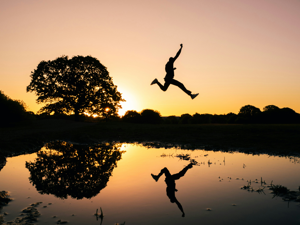
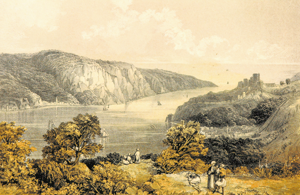
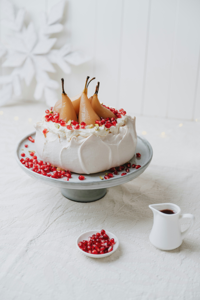
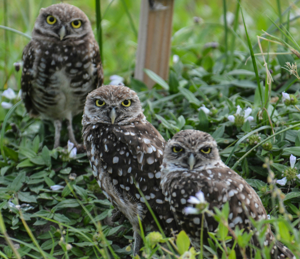
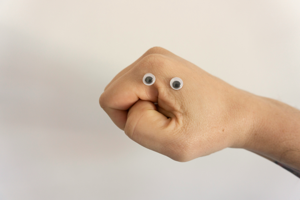
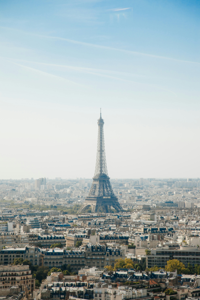
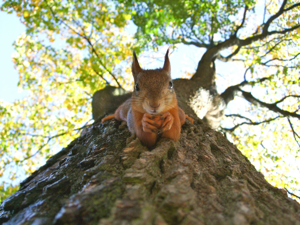
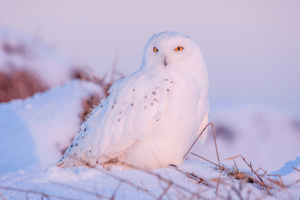
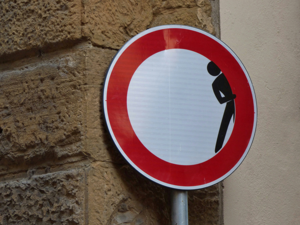
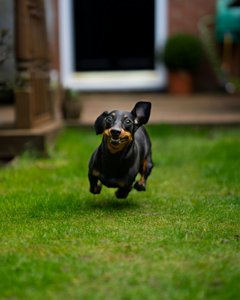
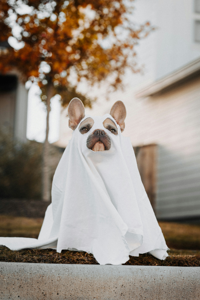
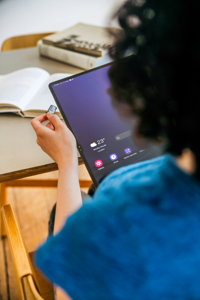
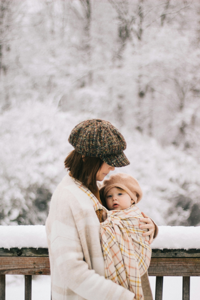
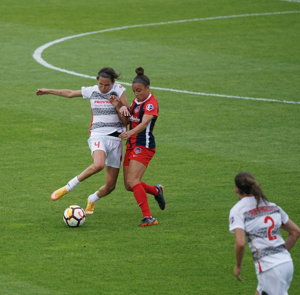
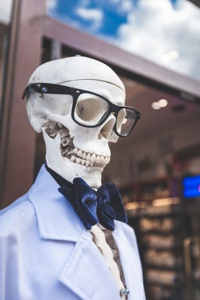
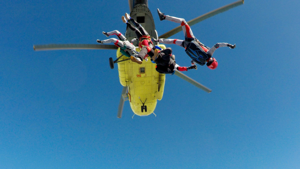
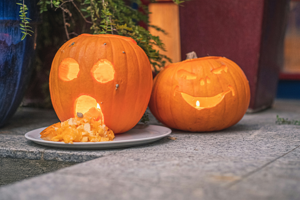
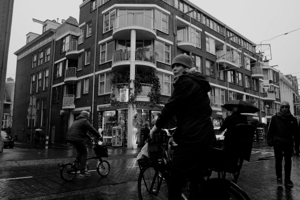
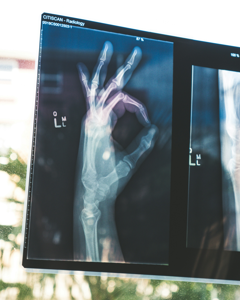
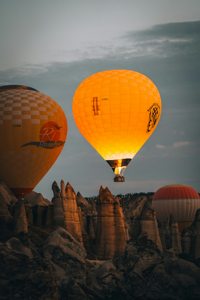
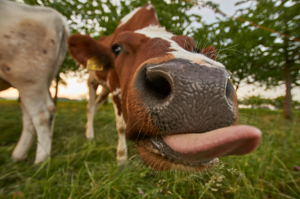
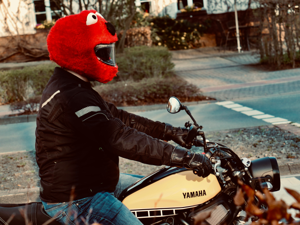
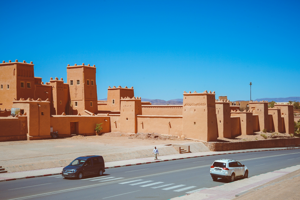
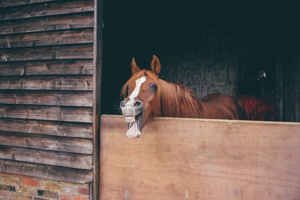
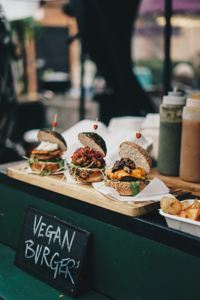

In [14]:
from svlearn_vlu.utils.display_captions_table import CaptionDisplay

image_dir = config["datasets"]["unsplash"]
captions_file = f"{image_dir}/captions.json"

caption_display = CaptionDisplay(image_dir, captions_file)
caption_display.display( num_samples=25, model_names=['blip', 'blip2', 'llava'])

## References

- [Visual Instruction Tuning](https://arxiv.org/abs/2304.08485)
- [LLaVA: Large Language and Vision Assistant](https://github.com/haotian-liu/LLaVA)
